In [ ]:
#Import libraries
import pandas as pd
import os

#Load the dataset
file_path = 'telcochurn.csv' 
df = pd.read_csv(file_path)

#Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Check for missing values
df.isnull().sum()
#Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

#Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

#Normalization/Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

#Display first few rows of the dataset
df_encoded.head()


C:\Users\sirge\AppData\Local\Temp\ipykernel_34416\2240875239.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\sirge\AppData\Local\Temp\ipykernel_34416\2240875239.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,-0.439916,-1.277445,-1.160323,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.439916,0.066327,-0.259629,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.439916,-1.236724,-0.362660,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.439916,0.514251,-0.746535,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


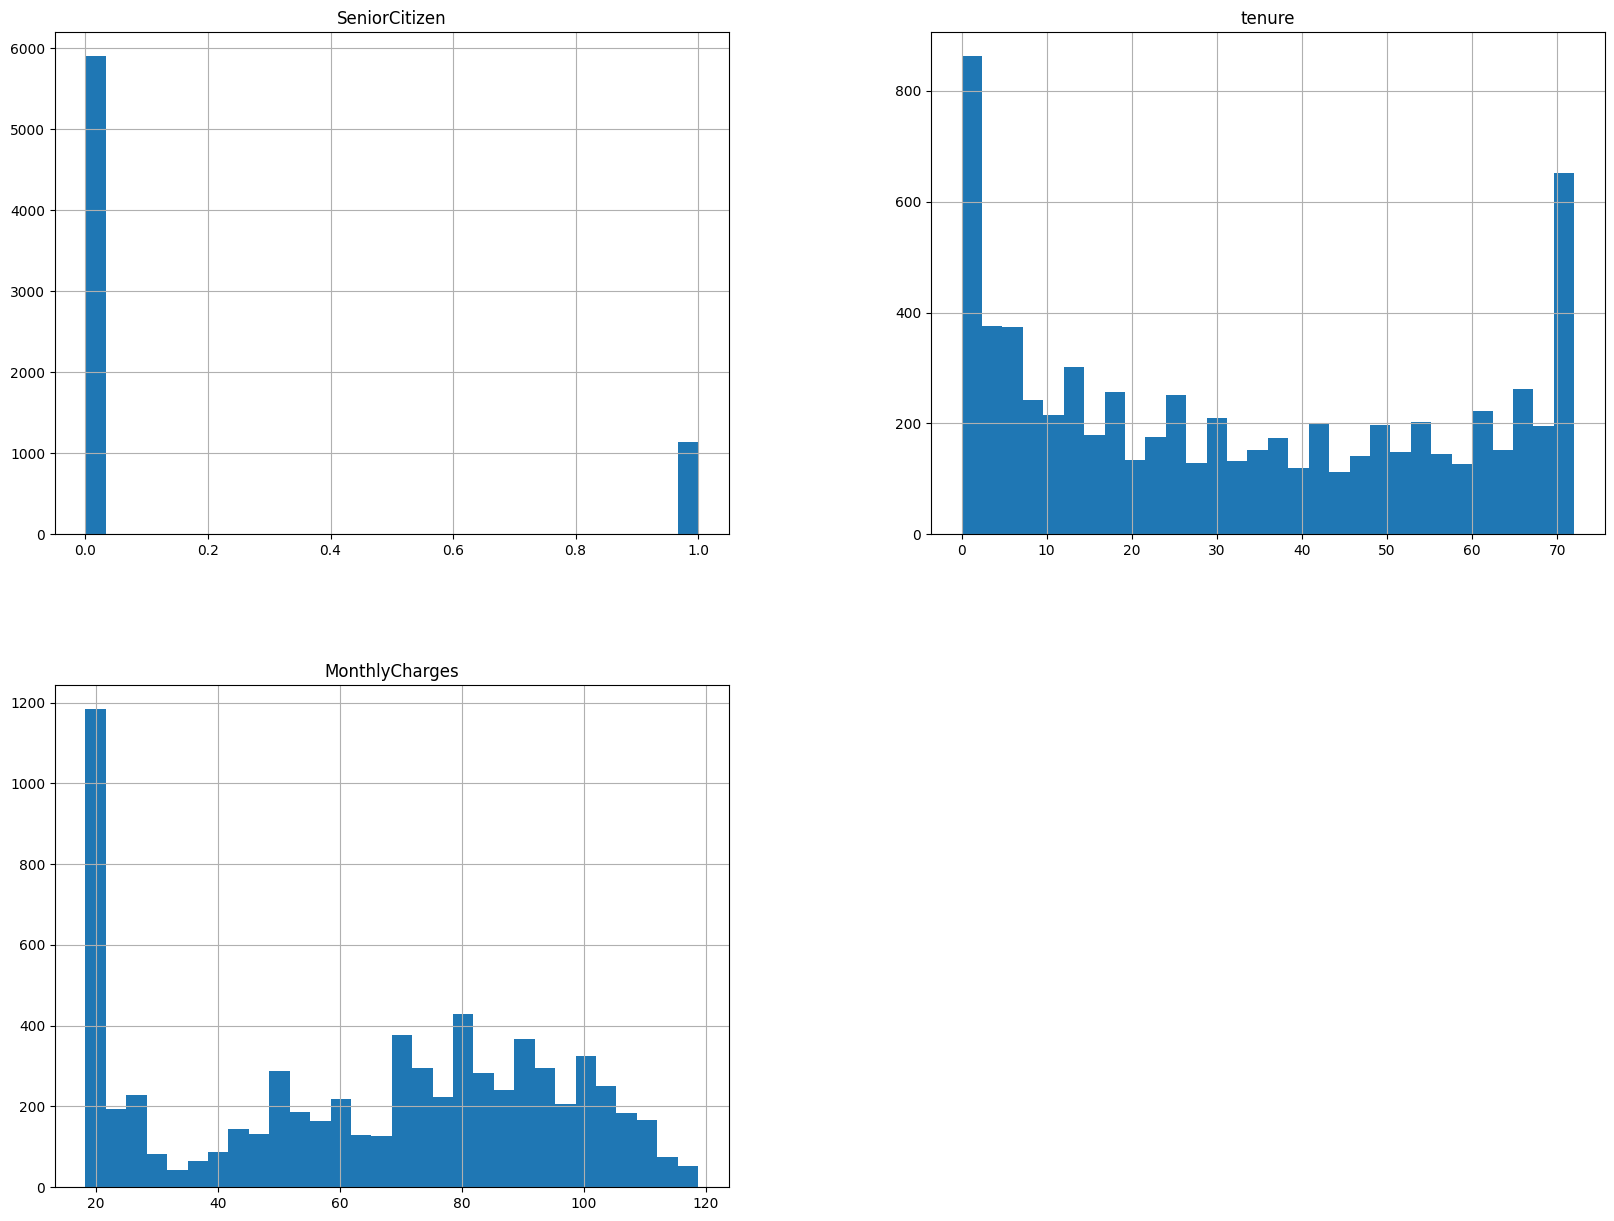

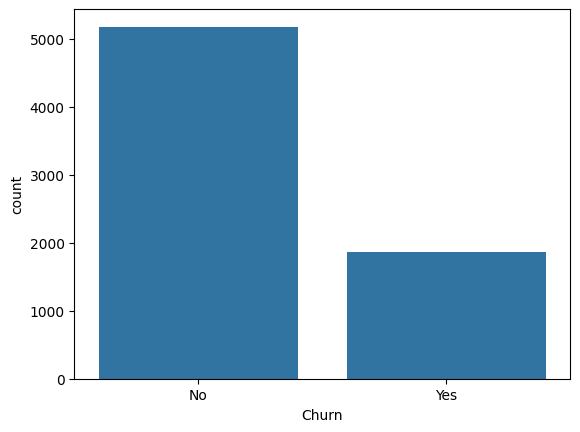

In [5]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
df.describe()

# Visualization: distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Check the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.show()


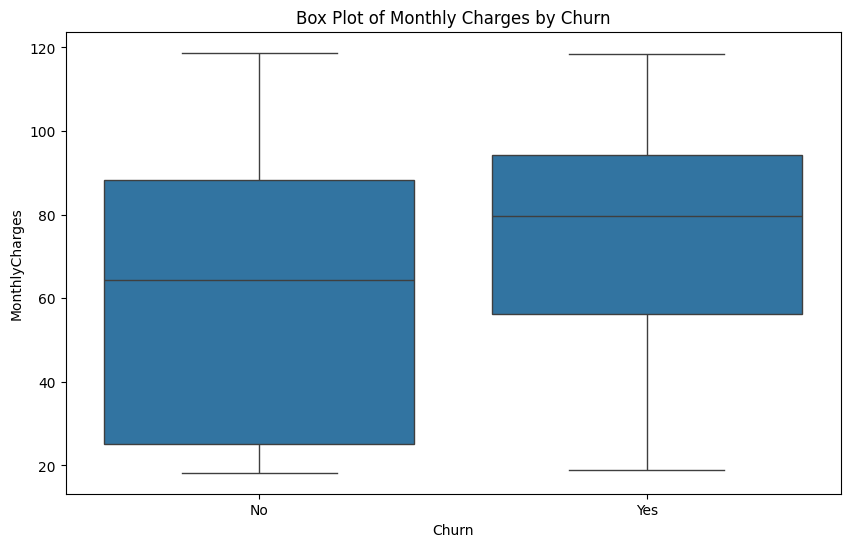

In [6]:
#Box Plot of Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Box Plot of Monthly Charges by Churn')
plt.show()

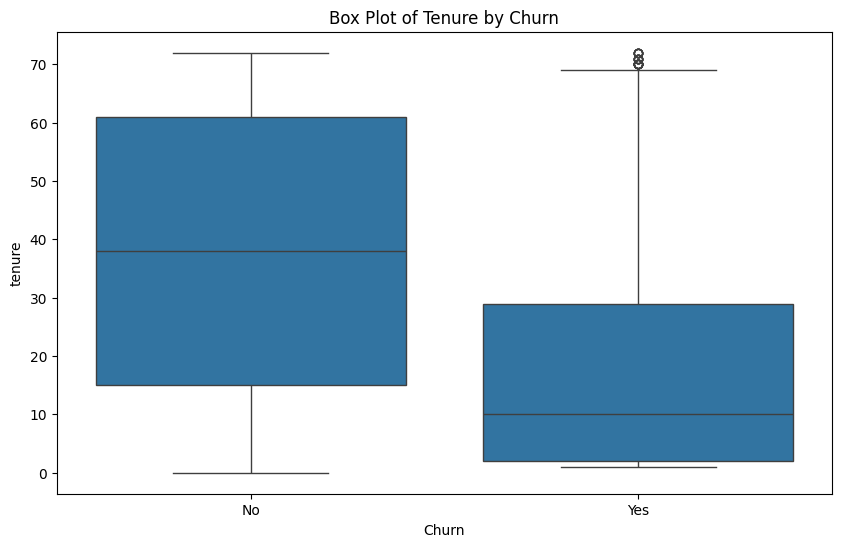

In [7]:
#Box Plot of Tenure by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot of Tenure by Churn')
plt.show()

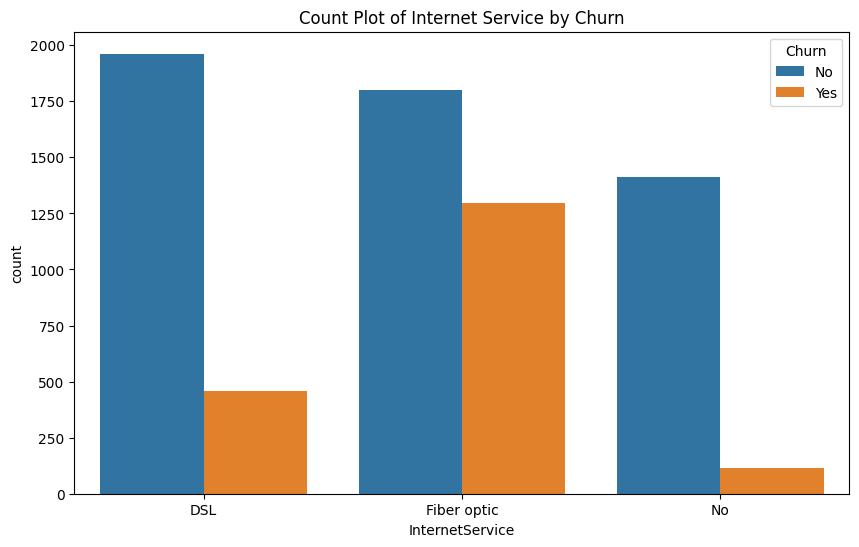

In [8]:
#Count Plot of Internet Service by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Count Plot of Internet Service by Churn')
plt.show()

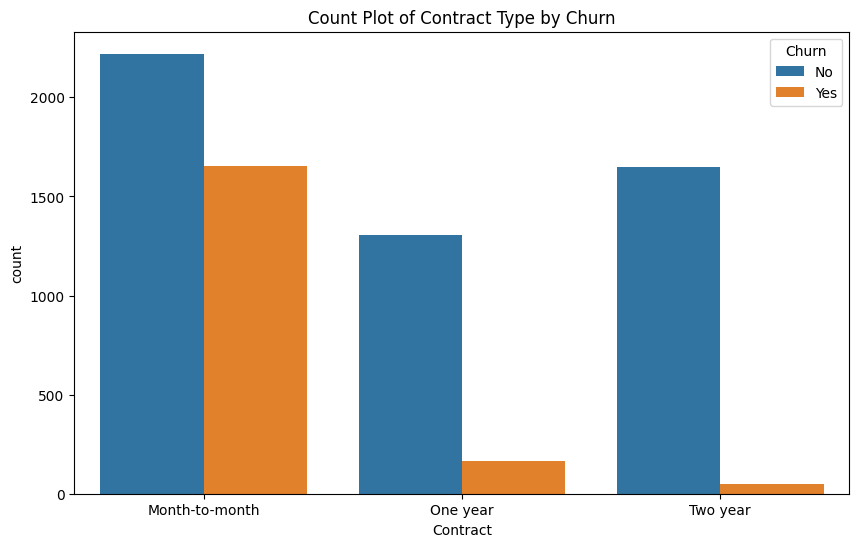

In [9]:
#Count Plot of Contract Type by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Count Plot of Contract Type by Churn')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

#Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

#Split the data into features (X) and target variable (y)
X = df_encoded.drop('Churn_Yes', axis=1)  # Exclude the target variable
y = df_encoded['Churn_Yes']  # Target variable

#Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")



Logistic Regression Model
Confusion Matrix:
[[597 439]
 [ 46 327]]
ROC AUC Score:
0.7264652147359922
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.58      0.71      1036
        True       0.43      0.88      0.57       373

    accuracy                           0.66      1409
   macro avg       0.68      0.73      0.64      1409
weighted avg       0.80      0.66      0.67      1409



Random Forest Model
Confusion Matrix:
[[969  67]
 [210 163]]
ROC AUC Score:
0.686162752181519
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.94      0.87      1036
        True       0.71      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409





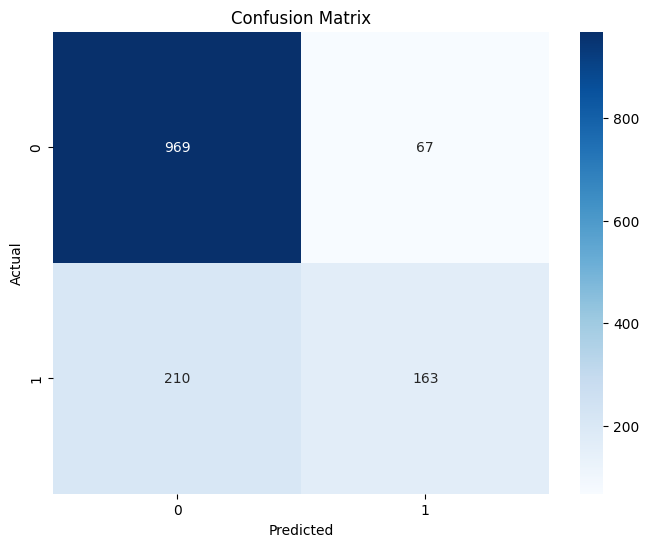

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


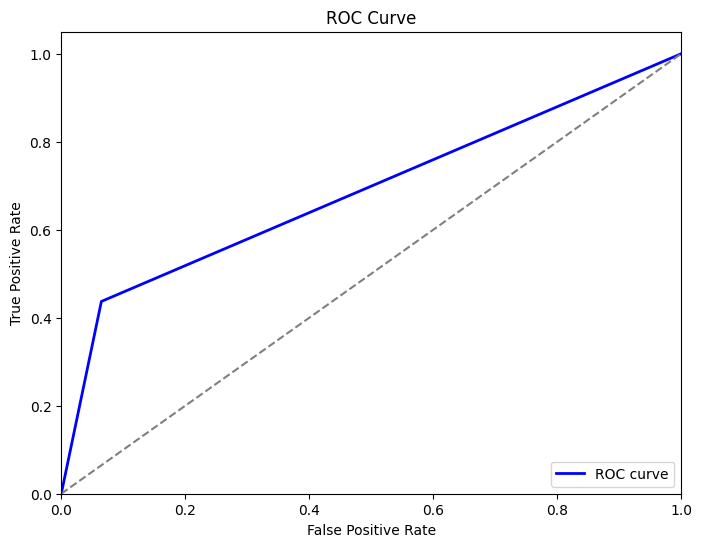

In [12]:
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


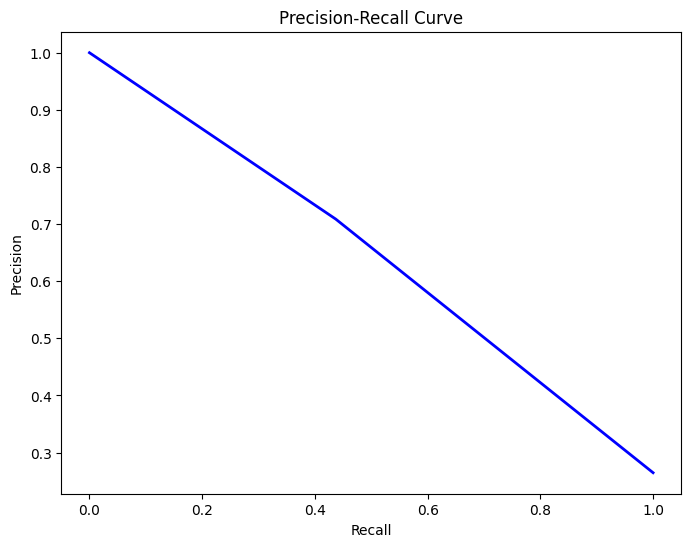

In [13]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset (assuming the dataset is already loaded into a DataFrame named df)

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target variable (y)
X = df_encoded.drop('Churn_Yes', axis=1)  # Exclude the target variable
y = df_encoded['Churn_Yes']  # Target variable

# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict using the models
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate models
print("Logistic Regression Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("\n")

print("Random Forest Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importances for Random Forest
importances = random_forest_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()
